Performance Evaluation and Optimization of Supervised Machine Learning Models for Wine Quality Classification

STEP 1: Import Required Libraries

In [3]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc)

STEP 2: Load and Explore the Dataset

In [40]:
data = pd.read_csv('/content/WineData.csv')   # adjust the path if needed
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [41]:
#Data Information: Purpose: Understand dataset size, variable types, and any missing data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [42]:
#Data Quality
data ['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [43]:
#describe
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


STEP 3: Exploratory Data Analysis (EDA)

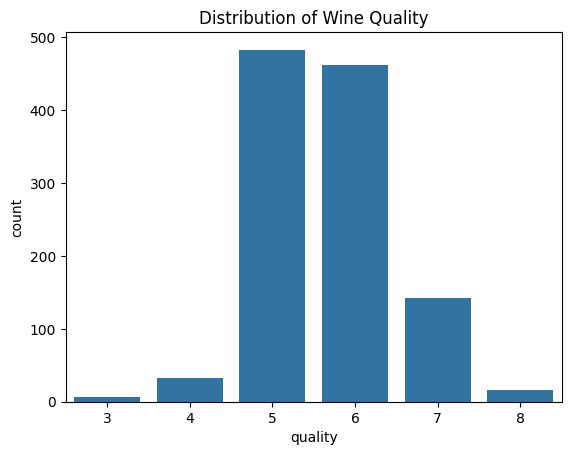

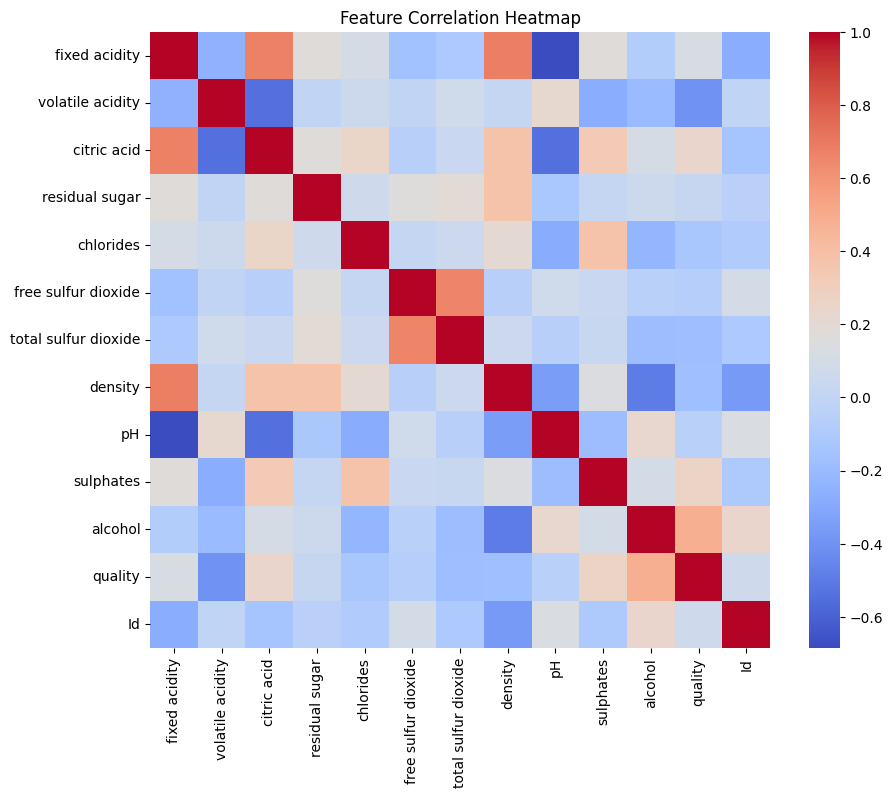

In [45]:
#STEP 3: Exploratory Data Analysis (EDA): This helps you understand class balance and which features might be influential.
# Visualize target variable distribution
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

STEP 4: Data Preprocessing

In [47]:
# STEP 4: Data Preprocessing
# Define features (X) and target/Output (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Convert to binary classification (example: good wine ≥7)
y = np.where(y >= 7, 1, 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling: caling is crucial for SVM and KNN; target encoding simplifies multiclass labels for metrics like AUC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

STEP 5: Train Base Models

In [58]:
# STEP 5: Train Base Models: This gives you baseline results before optimization.
models ={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\n")

===== Logistic Regression =====
Accuracy: 0.868995633187773
Precision: 0.55
Recall: 0.34375
F1-Score: 0.4230769230769231
ROC-AUC: 0.8467639593908629


===== Random Forest =====
Accuracy: 0.9213973799126638
Precision: 0.7692307692307693
Recall: 0.625
F1-Score: 0.6896551724137931
ROC-AUC: 0.9089467005076142


===== SVM =====
Accuracy: 0.8995633187772926
Precision: 0.7647058823529411
Recall: 0.40625
F1-Score: 0.5306122448979592
ROC-AUC: 0.8488261421319797


===== KNN =====
Accuracy: 0.868995633187773
Precision: 0.5416666666666666
Recall: 0.40625
F1-Score: 0.4642857142857143
ROC-AUC: 0.8066307106598984




STEP 6: Hyperparameter Optimization (GridSearchCV)

In [ ]:
# STEP 6: Hyperparameter Tuning

# STEP 6: Hyperparameter Tuning for All Models

# Logistic Regression
log_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs', 'liblinear']
}
log_grid = GridSearchCV(LogisticRegression(max_iter=1000),
                        log_params, cv=5, scoring='f1', n_jobs=-1)
log_grid.fit(X_train, y_train)
best_log = log_grid.best_estimator_

# Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True, random_state=42),
                        svm_params, cv=5, scoring='f1', n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# KNN
knn_params = {'n_neighbors': [3,5,7,9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        knn_params, cv=5, scoring='f1', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_


STEP 7: Evaluate Optimized Models

In [66]:
# STEP 7: Evaluate Optimized Models
optimized_models = {
    "Logistic Regression (Tuned)": best_log,
    "Random Forest (Tuned)": best_rf,
    "SVM (Tuned)": best_svm,
    "KNN (Tuned)": best_knn
}

for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"===== {name} =====")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("F1-Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))
    print(classification_report(y_test, y_pred))
    print("\n")

===== Logistic Regression (Tuned) =====
Accuracy: 0.8865
Precision: 0.7143
Recall: 0.3125
F1-Score: 0.4348
ROC-AUC: 0.8395
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       197
           1       0.71      0.31      0.43        32

    accuracy                           0.89       229
   macro avg       0.81      0.65      0.69       229
weighted avg       0.87      0.89      0.87       229



===== Random Forest (Tuned) =====
Accuracy: 0.9258
Precision: 0.8
Recall: 0.625
F1-Score: 0.7018
ROC-AUC: 0.9111
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       197
           1       0.80      0.62      0.70        32

    accuracy                           0.93       229
   macro avg       0.87      0.80      0.83       229
weighted avg       0.92      0.93      0.92       229



===== SVM (Tuned) =====
Accuracy: 0.917
Precision: 0.8095
Recall: 0.5312
F1-Score: 0.6415
ROC-AUC: 0.865
 

STEP 8: ROC Curves Visualization

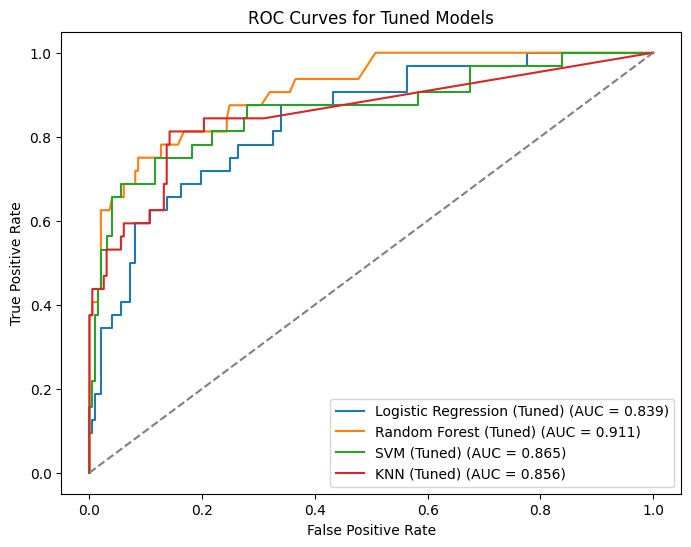

In [67]:
# STEP 8: ROC Curve Comparison
plt.figure(figsize=(8,6))
for name, model in optimized_models.items():
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.3f})')

plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curves for Tuned Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

STEP 9: Comparative Results Table

In [68]:
# STEP 9: Comparison Summary Table

results = []
for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='F1-Score', ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
1,Random Forest (Tuned),0.925764,0.800000,0.62500,0.701754,0.911088
2,SVM (Tuned),0.917031,0.809524,0.53125,0.641509,0.865006
3,KNN (Tuned),0.890830,0.629630,0.53125,0.576271,0.855806
0,Logistic Regression (Tuned),0.886463,0.714286,0.31250,0.434783,0.839467


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1-Score'].plot(kind='hist', bins=20, title='F1-Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Recall', y='F1-Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='F1-Score', y='ROC-AUC', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['F1-Score'].plot(kind='line', figsize=(8, 4), title='F1-Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='F1-Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)